In [2]:
library(adoptr)
library(dplyr)

options(repr.plot.width=12, repr.plot.height=6)


Attaching package: ‘dplyr’


The following object is masked from ‘package:adoptr’:

    n


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
H0 <- PointMassPrior(.0, 1)
H1 <- ContinuousPrior(function(theta) dnorm(theta, 0.5, 0.2)/(pnorm(1, 0.5, 0.2) - pnorm(-1, 0.5, 0.2)), c(-1, 1))

In [8]:
 ESS <- ExpectedSampleSize(Normal(two_armed = FALSE), H1)
  EP <- Power(Normal(two_armed = FALSE), condition(H1, c(0, 1)))
TOER <- Power(Normal(two_armed = FALSE), H0)
  PP <- ConditionalPower(Normal(two_armed = FALSE), condition(H1, c(0, 1)))

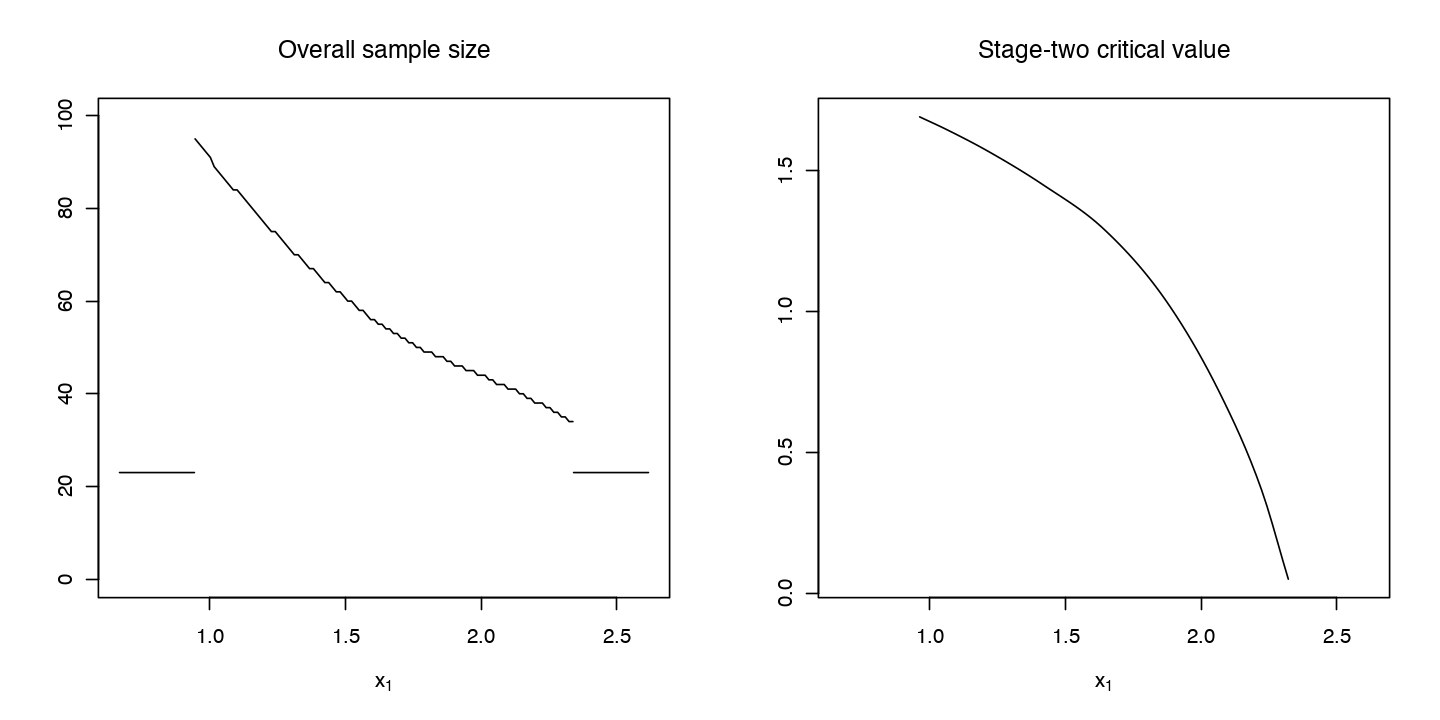

In [12]:
res <- minimize(
    ESS,
    subject_to(
          EP >= 0.8,
        TOER <= 0.025,
          PP >= 0.8
    ),
    get_initial_design(
        theta = .4,
        alpha = .025,
        beta  = .2,
        type  = "two-stage",
        dist  = Normal(two_armed = FALSE),
        order = 9L
    )
)

plot(res$design)

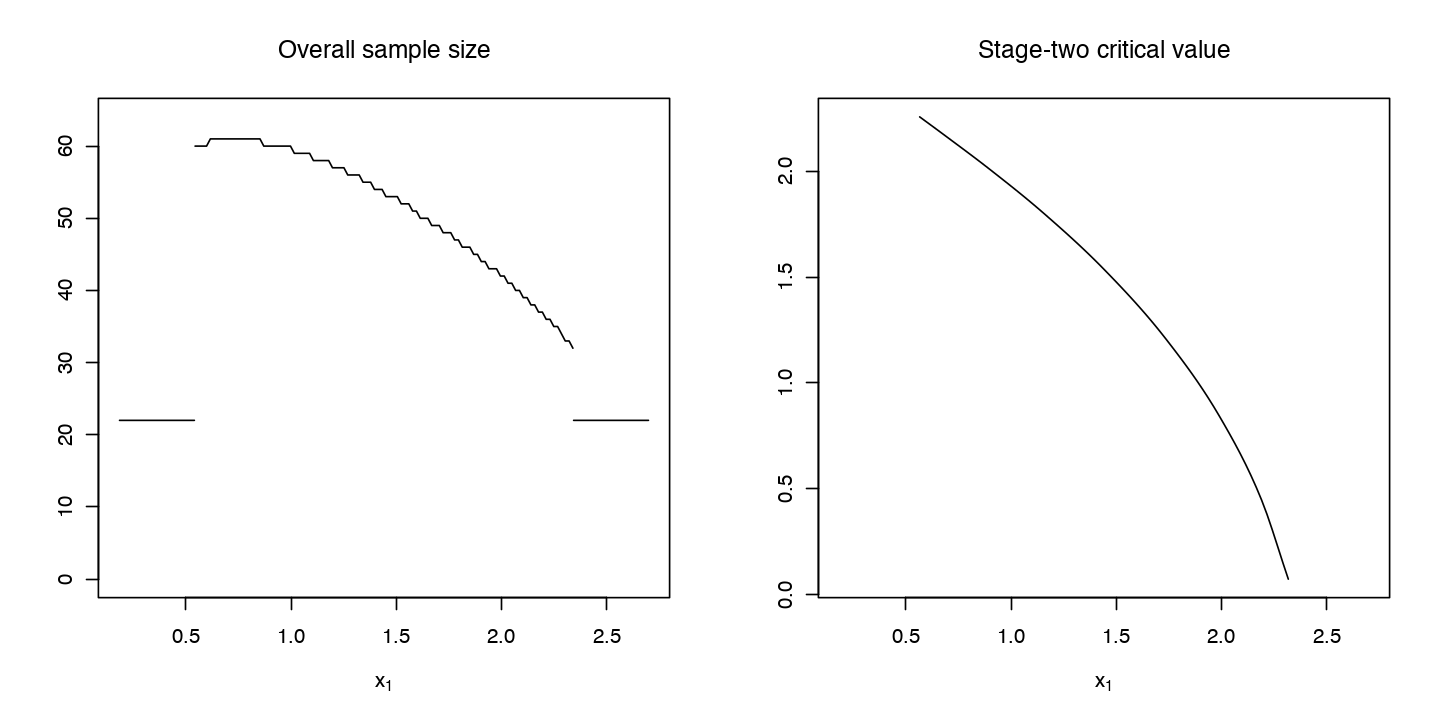

In [13]:
res2 <- minimize(
    ESS,
    subject_to(
          EP >= 0.8,
        TOER <= 0.025
    ),
    get_initial_design(
        theta = .4,
        alpha = .025,
        beta  = .2,
        type  = "two-stage",
        dist  = Normal(two_armed = FALSE),
        order = 9L
    )
)

plot(res2$design)